In [2]:
import pandas as pd
import scipy as sc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
df = pd.read_csv("week_purchases18-25.txt", delimiter='\t')

In [ ]:
print(df)

In [ ]:
print('Tamanho do df: '+str(df.size))
print(df.describe())
print()
print(df.dtypes)


In [ ]:
missing_rows = df.isnull().any(axis=1)
# dframe_missing_rows = df[missing_rows]
# print(dframe_missing_rows)
print(missing_rows)

In [ ]:
columns_with_NaN = df.isnull().any()
print(columns_with_NaN)

In [ ]:
#ex2

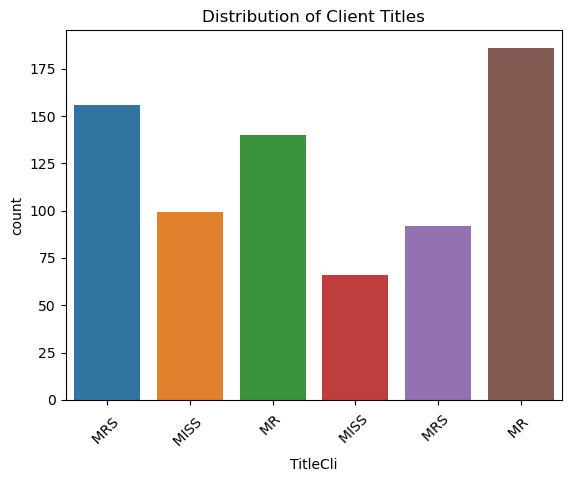

In [5]:
sns.countplot(data=df, x='TitleCli')
plt.title("Distribution of Client Titles")
plt.xticks(rotation=45)
plt.show()

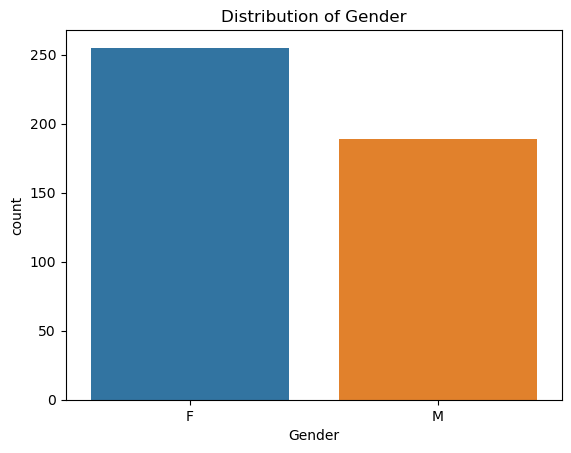

In [6]:
sns.countplot(data=df, x='Gender')
plt.title("Distribution of Gender")
plt.show()

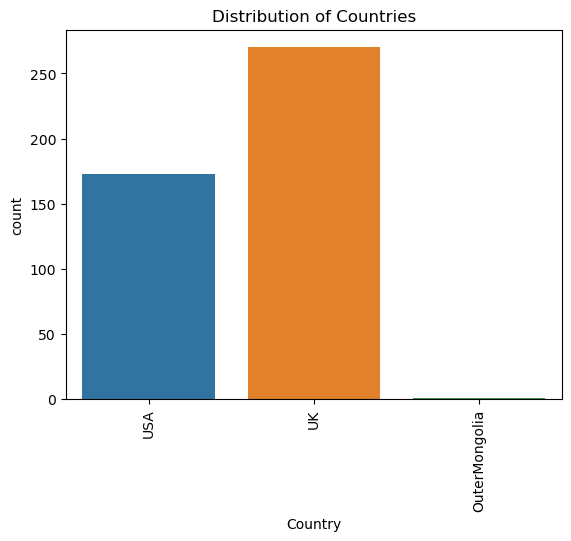

In [8]:
# Plot the distribution of Country
sns.countplot(data=df, x='Country')
plt.title("Distribution of Countries")
plt.xticks(rotation=90)  # This might be needed if you have many countries
plt.show()

In [7]:
#fazer correções aos dados
#title cliente tem inconsistências devido à existências de whitespaces a mais. fazer trim

df['TitleCli'] = df['TitleCli'].str.strip()
print(df)

         Username TitleCli         Name                         Address  \
0    user_1000884      MRS  DORIS126855  89594388-Boris Road-Doris Town   
1    user_1009862      MRS   DORIS42531  75844730-Boris Road-Doris Town   
2    user_1025298     MISS  DORIS136770  39704306-Boris Road-Doris Town   
3    user_1039001       MR  BORIS111529  46627181-Boris Road-Doris Town   
4    user_1040891      MRS  DORIS142154  82645107-Boris Road-Doris Town   
..            ...      ...          ...                             ...   
734   user_972607      MRS    DORIS6273  36217755-Boris Road-Doris Town   
735   user_975665       MR   BORIS95778  43605144-Boris Road-Doris Town   
736   user_979177      MRS   DORIS74765  94620905-Boris Road-Doris Town   
737    user_99281       MR   BORIS13620  57719599-Boris Road-Doris Town   
738   user_993341       MR  BORIS137380  29294945-Boris Road-Doris Town   

    Country Gender   Age Favourites           Order_ID  Product_ID      Style  \
0       USA      F

In [ ]:
#ex3

In [19]:
films_by_style = df.groupby('Style')['Film_Title'].count()

print(films_by_style)

Style
Adventure     47
Children     151
Comedy       214
Drama         94
Horror        50
Musical       28
Sci-Fi        92
Western       63
Name: Film_Title, dtype: int64


In [4]:
films_by_style_unique = df.groupby('Style')['Film_Title'].nunique()

print(films_by_style_unique)

Style
Adventure     5
Children      3
Comedy       18
Drama         3
Horror        4
Musical       5
Sci-Fi       11
Western      12
Name: Film_Title, dtype: int64


In [12]:
# Group by 'Style' and 'Film_Title' and count the number of units sold for each combination
units_sold = df.groupby(['Style', 'Film_Title']).size().reset_index(name='Units_Sold')

print(units_sold)

        Style                                         Film_Title  Units_Sold
0   Adventure                                         Hard Rider           9
1   Adventure                                     LighteningBall           7
2   Adventure                                     The Fourth Man          10
3   Adventure                                        The IP File          11
4   Adventure                                     The Nine Rules          10
..        ...                                                ...         ...
56    Western                                        The Finders           3
57    Western  The Nice the not so nice and the visually chal...           5
58    Western                                    The average six           4
59    Western                                         TheatreBus          17
60    Western                                          True Salt           3

[61 rows x 3 columns]


In [15]:
number_costumers = df.groupby('Username').size()
purchase_numbers = number_costumers.value_counts().sort_index()
print(purchase_numbers)

1    547
2     74
3     12
4      2
dtype: int64
